In [50]:
## clustering analysis on people coming to malls based on annual income and spending score.

In [1]:
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

C:\Users\revat\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
df = pd.read_csv("Mall_customers.csv", encoding = 'utf-8')

In [13]:
dat = ff.create_table(df.head())
py.iplot(dat)

In [4]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

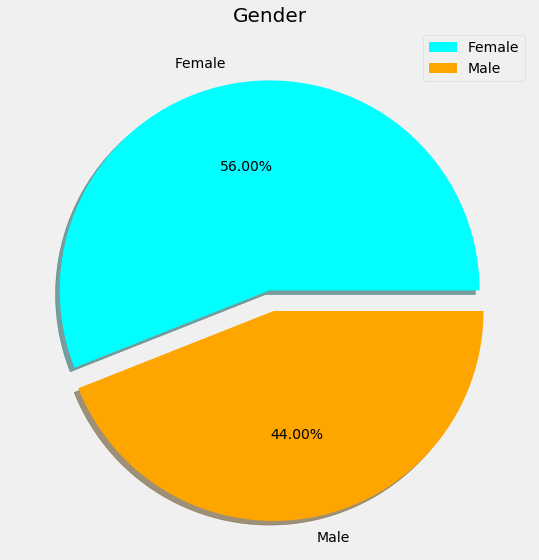

In [54]:
labels = ['Female', 'Male']
size = df['Genre'].value_counts()
colors = ['cyan', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

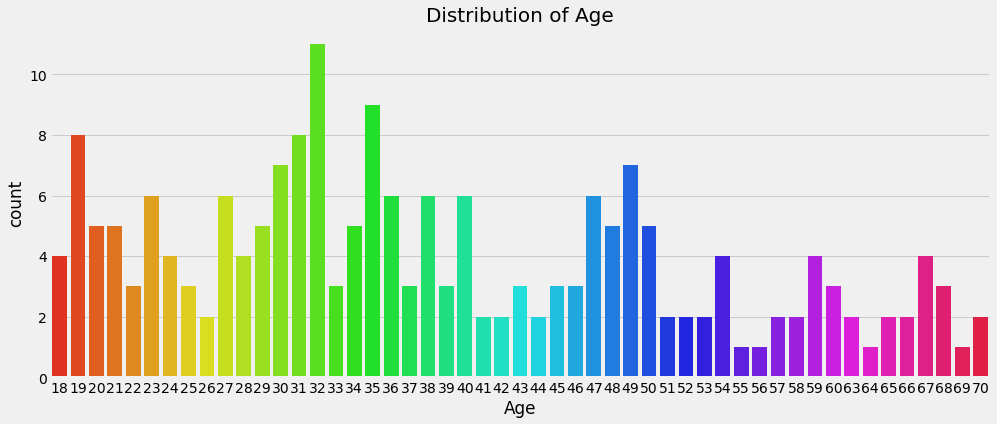

In [55]:
plt.rcParams['figure.figsize'] = (15, 6)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

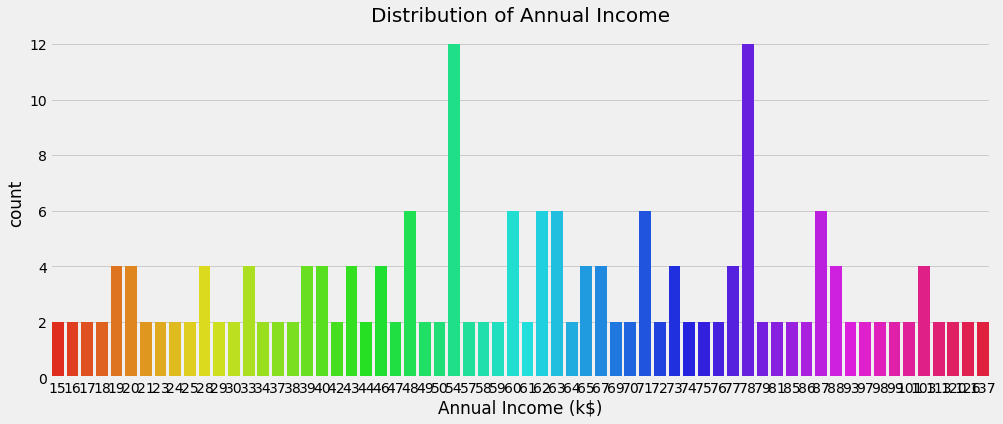

In [56]:
plt.rcParams['figure.figsize'] = (15, 6)
sns.countplot(df['Annual Income (k$)'], palette = 'hsv')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

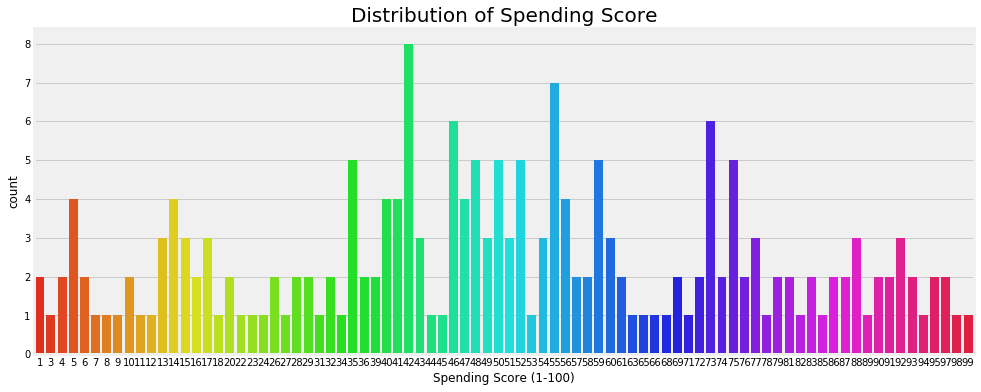

In [28]:
plt.rcParams['figure.figsize'] = (15, 6)
sns.countplot(df['Spending Score (1-100)'], palette = 'hsv')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

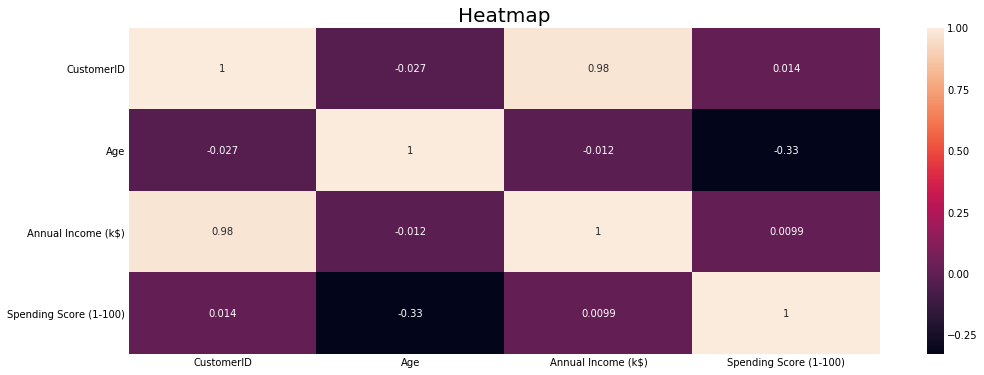

In [31]:
sns.heatmap(df.corr(), annot = True)
plt.title('Heatmap', fontsize = 20)
plt.show()

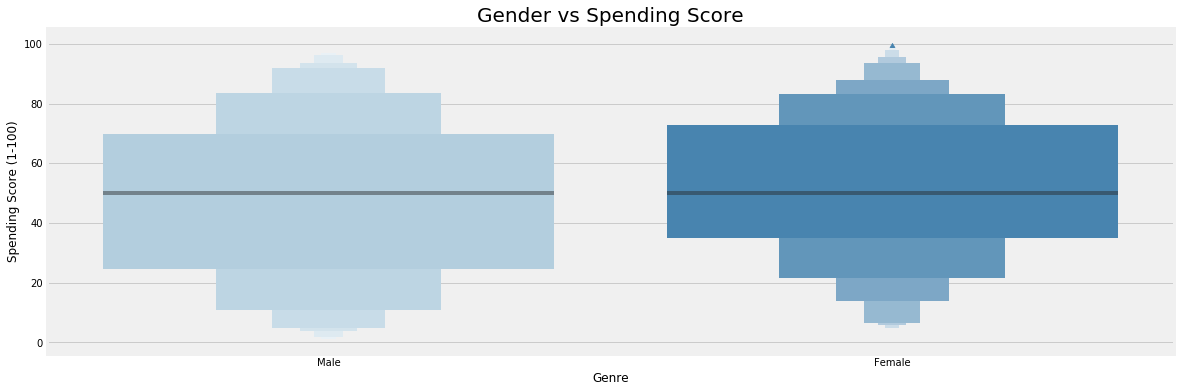

In [33]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.boxenplot(df['Genre'], df['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

In [5]:
# x = df.iloc[:].values
x = df.iloc[:, [3, 4]].values
# print(x)
# let's check the shape of x
print(x.shape)

(200, 2)


In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state = 10)

In [15]:
import sweetviz

In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
report1 = sweetviz.compare([train, "Train"], [test, "Test"], "Spending Score (1-100)")




                                   |                         | [  0%]   00:00  -> (? left)


Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)


:TARGET::                          |███▌                 | [ 17%]   00:00  -> (00:00 left)


:TARGET::                          |███████              | [ 33%]   00:01  -> (00:02 left)


:CustomerID:                       |███████              | [ 33%]   00:01  -> (00:02 left)


:CustomerID:                       |██████████▌          | [ 50%]   00:02  -> (00:02 left)


:Genre:                            |██████████▌          | [ 50%]   00:02  -> (00:02 left)


:Genre:                            |██████████████       | [ 67%]   00:03  -> (00:01 left)


:Age:                              |██████████████       | [ 67%]   00:03  -> (00:01 left)


:Age:                              |█████████████████▌   | [ 83%]   00:04  -> (00:01 left)


:Annual Income (k$):               |█████████████████▌   | [ 83%]  

Creating Associations graph... DONE!


In [21]:
report1.show_html("Spending_Report.html")

In [58]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

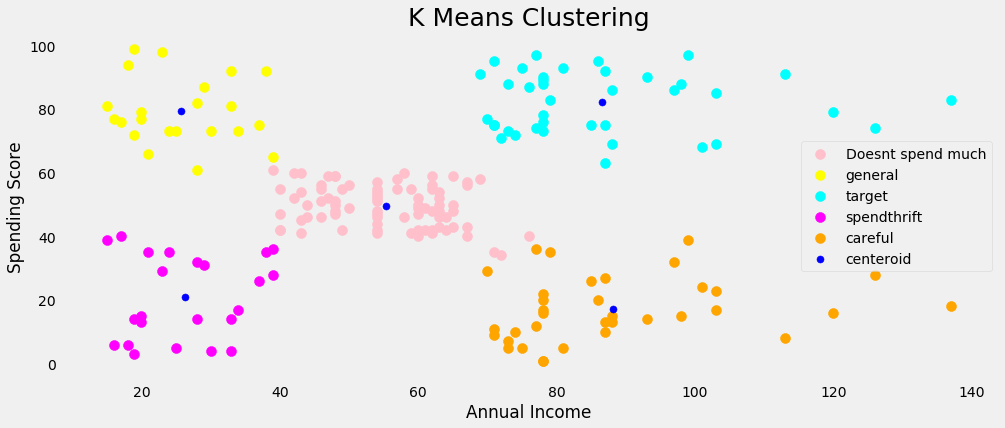

In [66]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Doesnt spend much')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 25)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()